In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [17]:
#Загрузка датасета
dataset=pd.read_excel('General_exl_modul.xlsx')
dataset.drop(['Unnamed: 0'],axis=1,inplace=True)
dataset.shape

(999, 12)

In [18]:
#разбивка датасета на тестовую, тренировочную выборки
x_train, x_test, y_train, y_test= train_test_split(dataset.loc[:, dataset.columns != 'Прочность при растяжении, МПа'],
 dataset[['Прочность при растяжении, МПа']],
 test_size = 0.3,
 random_state = 42)

In [19]:
# Проверка правильности разбивки
dataset.shape[0] - x_train.shape[0] - x_test.shape[0]

0

In [20]:
x_train

,Соотношение матрица-наполнитель,"Плотность, кг/м3","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,"модуль упругости, ГПа"
728,4.660319,1987.700316,139.342427,19.151985,304.039184,829.254993,197.398991,90,10.285612,61.662903,629.189776
630,3.073297,1920.881890,130.163998,24.235156,319.182157,239.535319,181.319236,90,3.851420,53.582761,783.077060
394,3.940619,1964.780616,84.337635,20.057061,262.470548,334.700978,255.304191,0,6.904562,58.523247,443.924976
777,2.643958,1927.758805,150.358605,26.110731,271.489290,354.681893,224.099800,90,2.042772,64.517457,797.667502
598,2.547478,1923.762595,130.656142,21.845865,328.386305,611.326829,251.450925,90,6.374020,56.332103,597.141517
...,...,...,...,...,...,...,...,...,...,...,...
106,3.490162,1986.340110,93.748554,24.593272,338.101359,76.682693,261.819468,0,3.708515,78.380006,1257.779003
270,4.434429,2061.918771,81.071393,23.213218,244.874100,934.780246,178.066150,0,2.788476,11.740126,328.876626
860,4.864317,1924.112827,98.444676,23.418492,301.941401,132.354841,130.658215,90,7.259854,62.728466,915.469142
435,3.501415,2037.052469,109.701267,22.881159,261.351487,828.061175,205.540520,0,7.539173,52.246884,746.020626


In [21]:
y_train

,"Прочность при растяжении, МПа"
728,2576.325922
630,2697.698968
394,2174.615390
777,2462.709683
598,3495.239969
...,...
106,2605.949634
270,2995.952606
860,2152.127763
435,2475.114083


In [22]:
# Размер тестовой выборки
x_test

,Соотношение матрица-наполнитель,"Плотность, кг/м3","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,"модуль упругости, ГПа"
453,2.870544,2087.293217,80.430240,23.476372,205.286821,500.887933,230.792998,0,5.897057,88.807647,257.935595
793,3.649739,1976.146239,157.541400,22.736201,307.650734,432.251636,204.844970,90,6.511228,68.664498,712.379573
209,2.509977,1912.215145,87.198840,21.883152,252.331069,781.355358,206.428712,0,0.145034,54.138756,1056.096385
309,3.113267,2020.309903,129.578767,20.798849,306.088190,777.962700,290.986464,0,5.364139,54.581442,383.006898
740,3.460576,2070.530524,76.858347,24.209401,268.288453,716.274381,205.546133,90,5.376332,52.977356,148.258590
...,...,...,...,...,...,...,...,...,...,...,...
314,2.223337,1929.584696,123.687384,20.520041,292.678638,469.436557,216.479290,0,9.511737,58.196301,444.184402
404,3.065947,2020.828331,88.688127,24.802379,292.716588,636.836532,205.620277,0,5.315338,56.004141,924.667791
7,2.561475,1900.000000,111.860000,22.267857,284.615385,380.000000,120.000000,0,7.000000,47.000000,535.000000
155,2.314541,2005.151555,81.793370,25.179894,265.652005,219.876245,239.280576,0,0.390191,51.570139,905.473601


In [23]:
y_test

,"Прочность при растяжении, МПа"
453,2759.752788
793,2668.738929
209,2029.147825
309,2160.777729
740,2039.609992
...,...
314,1908.203759
404,1799.493329
7,1800.000000
155,2053.646797


In [27]:
# Метод опорных векторов
svr = make_pipeline(StandardScaler(), 
                    SVR(kernel = 'rbf', C = 500.0, epsilon = 1.0))
svr.fit(x_train, np.ravel(y_train))
y_pred_train=svr.predict(x_train)
y_pred_test=svr.predict(x_test)
det_train=svr.score(x_train, y_train)
det_test=svr.score(x_test, y_test)
mae_train = mean_absolute_error(y_pred_train, y_train)
mae_test = mean_absolute_error(y_pred_test, y_test)
print("Train score:",det_train) 
print('MAE_train:', mae_train)
print("Test score:",det_test)
print('MAE_test:', mae_test)

Train score: 0.37391488072047874
MAE_train: 253.96655786448184
Test score: -0.15110392719032384
MAE_test: 395.18112584759734


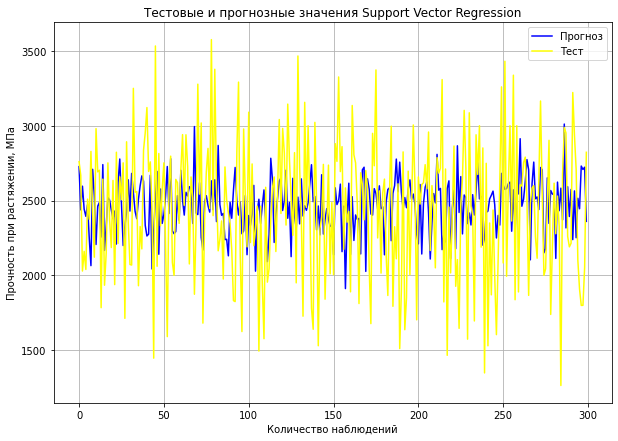

In [25]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Support Vector Regression")
plt.plot(y_pred_test, label = "Прогноз", color = "blue")
plt.plot(y_test.values, label = "Тест", color = "yellow")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

In [23]:
#подбор оптимальных гиперпараметров для метода SVМ
param_grid = {"C": [0.1, 1, 10, 100, 1000], 
              "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
              "kernel": ["rbf"]} 
grid = GridSearchCV(SVR(), param_grid, 
                    refit = True, cv=10,verbose = 3)
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV 1/10] END ......C=0.1, gamma=1, kernel=rbf;, score=-0.056 total time=   0.0s
[CV 2/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.084 total time=   0.0s
[CV 3/10] END ......C=0.1, gamma=1, kernel=rbf;, score=-0.007 total time=   0.0s
[CV 4/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.005 total time=   0.0s
[CV 5/10] END ......C=0.1, gamma=1, kernel=rbf;, score=-0.015 total time=   0.0s
[CV 6/10] END ......C=0.1, gamma=1, kernel=rbf;, score=-0.035 total time=   0.0s
[CV 7/10] END ......C=0.1, gamma=1, kernel=rbf;, score=-0.100 total time=   0.0s
[CV 8/10] END ......C=0.1, gamma=1, kernel=rbf;, score=-0.034 total time=   0.0s
[CV 9/10] END ......C=0.1, gamma=1, kernel=rbf;, score=-0.053 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV 10/10] END .....C=0.1, gamma=1, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 1/10] END ....C=0.1, gamma=0.1, kernel=rbf;, score=-0.051 total time=   0.0s
[CV 2/10] END .....C=0.1, gamma=0.1, kernel=rbf;, score=0.047 total time=   0.0s
[CV 3/10] END .....C=0.1, gamma=0.1, kernel=rbf;, score=0.007 total time=   0.0s
[CV 4/10] END ....C=0.1, gamma=0.1, kernel=rbf;, score=-0.016 total time=   0.0s
[CV 5/10] END .....C=0.1, gamma=0.1, kernel=rbf;, score=0.002 total time=   0.0s
[CV 6/10] END .....C=0.1, gamma=0.1, kernel=rbf;, score=0.009 total time=   0.0s
[CV 7/10] END ....C=0.1, gamma=0.1, kernel=rbf;, score=-0.054 total time=   0.0s
[CV 8/10] END ....C=0.1, gamma=0.1, kernel=rbf;, score=-0.016 total time=   0.0s
[CV 9/10] END ....C=0.1, gamma=0.1, kernel=rbf;, score=-0.026 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV 10/10] END ...C=0.1, gamma=0.1, kernel=rbf;, score=-0.018 total time=   0.0s
[CV 1/10] END ...C=0.1, gamma=0.01, kernel=rbf;, score=-0.083 total time=   0.0s
[CV 2/10] END ....C=0.1, gamma=0.01, kernel=rbf;, score=0.010 total time=   0.0s
[CV 3/10] END ...C=0.1, gamma=0.01, kernel=rbf;, score=-0.003 total time=   0.0s
[CV 4/10] END ...C=0.1, gamma=0.01, kernel=rbf;, score=-0.008 total time=   0.0s
[CV 5/10] END ...C=0.1, gamma=0.01, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 6/10] END ....C=0.1, gamma=0.01, kernel=rbf;, score=0.002 total time=   0.0s
[CV 7/10] END ...C=0.1, gamma=0.01, kernel=rbf;, score=-0.037 total time=   0.0s
[CV 8/10] END ...C=0.1, gamma=0.01, kernel=rbf;, score=-0.007 total time=   0.0s
[CV 9/10] END ...C=0.1, gamma=0.01, kernel=rbf;, score=-0.012 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV 10/10] END ..C=0.1, gamma=0.01, kernel=rbf;, score=-0.005 total time=   0.0s
[CV 1/10] END ..C=0.1, gamma=0.001, kernel=rbf;, score=-0.094 total time=   0.0s
[CV 2/10] END ...C=0.1, gamma=0.001, kernel=rbf;, score=0.001 total time=   0.0s
[CV 3/10] END ..C=0.1, gamma=0.001, kernel=rbf;, score=-0.007 total time=   0.0s
[CV 4/10] END ..C=0.1, gamma=0.001, kernel=rbf;, score=-0.007 total time=   0.0s
[CV 5/10] END ..C=0.1, gamma=0.001, kernel=rbf;, score=-0.003 total time=   0.0s
[CV 6/10] END ..C=0.1, gamma=0.001, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 7/10] END ..C=0.1, gamma=0.001, kernel=rbf;, score=-0.033 total time=   0.0s
[CV 8/10] END ..C=0.1, gamma=0.001, kernel=rbf;, score=-0.005 total time=   0.0s
[CV 9/10] END ..C=0.1, gamma=0.001, kernel=rbf;, score=-0.011 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV 10/10] END .C=0.1, gamma=0.001, kernel=rbf;, score=-0.006 total time=   0.0s
[CV 1/10] END .C=0.1, gamma=0.0001, kernel=rbf;, score=-0.096 total time=   0.0s
[CV 2/10] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 3/10] END .C=0.1, gamma=0.0001, kernel=rbf;, score=-0.007 total time=   0.0s
[CV 4/10] END .C=0.1, gamma=0.0001, kernel=rbf;, score=-0.007 total time=   0.0s
[CV 5/10] END .C=0.1, gamma=0.0001, kernel=rbf;, score=-0.003 total time=   0.0s
[CV 6/10] END .C=0.1, gamma=0.0001, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 7/10] END .C=0.1, gamma=0.0001, kernel=rbf;, score=-0.033 total time=   0.0s
[CV 8/10] END .C=0.1, gamma=0.0001, kernel=rbf;, score=-0.005 total time=   0.0s
[CV 9/10] END .C=0.1, gamma=0.0001, kernel=rbf;, score=-0.011 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV 10/10] END C=0.1, gamma=0.0001, kernel=rbf;, score=-0.006 total time=   0.0s
[CV 1/10] END ........C=1, gamma=1, kernel=rbf;, score=-0.052 total time=   0.0s
[CV 2/10] END .........C=1, gamma=1, kernel=rbf;, score=0.073 total time=   0.0s
[CV 3/10] END ........C=1, gamma=1, kernel=rbf;, score=-0.046 total time=   0.0s
[CV 4/10] END ........C=1, gamma=1, kernel=rbf;, score=-0.071 total time=   0.0s
[CV 5/10] END ........C=1, gamma=1, kernel=rbf;, score=-0.027 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV 6/10] END ........C=1, gamma=1, kernel=rbf;, score=-0.163 total time=   0.0s
[CV 7/10] END ........C=1, gamma=1, kernel=rbf;, score=-0.249 total time=   0.0s
[CV 8/10] END ........C=1, gamma=1, kernel=rbf;, score=-0.140 total time=   0.0s
[CV 9/10] END ........C=1, gamma=1, kernel=rbf;, score=-0.139 total time=   0.0s
[CV 10/10] END .......C=1, gamma=1, kernel=rbf;, score=-0.053 total time=   0.0s
[CV 1/10] END ......C=1, gamma=0.1, kernel=rbf;, score=-0.017 total time=   0.0s
[CV 2/10] END .......C=1, gamma=0.1, kernel=rbf;, score=0.081 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV 3/10] END .......C=1, gamma=0.1, kernel=rbf;, score=0.012 total time=   0.0s
[CV 4/10] END ......C=1, gamma=0.1, kernel=rbf;, score=-0.033 total time=   0.0s
[CV 5/10] END ......C=1, gamma=0.1, kernel=rbf;, score=-0.021 total time=   0.0s
[CV 6/10] END .......C=1, gamma=0.1, kernel=rbf;, score=0.005 total time=   0.0s
[CV 7/10] END ......C=1, gamma=0.1, kernel=rbf;, score=-0.087 total time=   0.0s
[CV 8/10] END ......C=1, gamma=0.1, kernel=rbf;, score=-0.049 total time=   0.0s
[CV 9/10] END ......C=1, gamma=0.1, kernel=rbf;, score=-0.056 total time=   0.0s
[CV 10/10] END .....C=1, gamma=0.1, kernel=rbf;, score=-0.044 total time=   0.0s
[CV 1/10] END .....C=1, gamma=0.01, kernel=rbf;, score=-0.047 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV 2/10] END ......C=1, gamma=0.01, kernel=rbf;, score=0.049 total time=   0.0s
[CV 3/10] END ......C=1, gamma=0.01, kernel=rbf;, score=0.010 total time=   0.0s
[CV 4/10] END .....C=1, gamma=0.01, kernel=rbf;, score=-0.019 total time=   0.0s
[CV 5/10] END ......C=1, gamma=0.01, kernel=rbf;, score=0.003 total time=   0.0s
[CV 6/10] END ......C=1, gamma=0.01, kernel=rbf;, score=0.011 total time=   0.0s
[CV 7/10] END .....C=1, gamma=0.01, kernel=rbf;, score=-0.058 total time=   0.0s
[CV 8/10] END .....C=1, gamma=0.01, kernel=rbf;, score=-0.018 total time=   0.0s
[CV 9/10] END .....C=1, gamma=0.01, kernel=rbf;, score=-0.027 total time=   0.0s
[CV 10/10] END ....C=1, gamma=0.01, kernel=rbf;, score=-0.018 total time=   0.0s
[CV 1/10] END ....C=1, gamma=0.001, kernel=rbf;, score=-0.084 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV 2/10] END .....C=1, gamma=0.001, kernel=rbf;, score=0.011 total time=   0.0s
[CV 3/10] END ....C=1, gamma=0.001, kernel=rbf;, score=-0.003 total time=   0.0s
[CV 4/10] END ....C=1, gamma=0.001, kernel=rbf;, score=-0.008 total time=   0.0s
[CV 5/10] END ....C=1, gamma=0.001, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 6/10] END .....C=1, gamma=0.001, kernel=rbf;, score=0.002 total time=   0.0s
[CV 7/10] END ....C=1, gamma=0.001, kernel=rbf;, score=-0.037 total time=   0.0s
[CV 8/10] END ....C=1, gamma=0.001, kernel=rbf;, score=-0.007 total time=   0.0s
[CV 9/10] END ....C=1, gamma=0.001, kernel=rbf;, score=-0.012 total time=   0.0s
[CV 10/10] END ...C=1, gamma=0.001, kernel=rbf;, score=-0.004 total time=   0.0s
[CV 1/10] END ...C=1, gamma=0.0001, kernel=rbf;, score=-0.094 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV 2/10] END ....C=1, gamma=0.0001, kernel=rbf;, score=0.001 total time=   0.0s
[CV 3/10] END ...C=1, gamma=0.0001, kernel=rbf;, score=-0.007 total time=   0.0s
[CV 4/10] END ...C=1, gamma=0.0001, kernel=rbf;, score=-0.007 total time=   0.0s
[CV 5/10] END ...C=1, gamma=0.0001, kernel=rbf;, score=-0.003 total time=   0.0s
[CV 6/10] END ...C=1, gamma=0.0001, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 7/10] END ...C=1, gamma=0.0001, kernel=rbf;, score=-0.033 total time=   0.0s
[CV 8/10] END ...C=1, gamma=0.0001, kernel=rbf;, score=-0.005 total time=   0.0s
[CV 9/10] END ...C=1, gamma=0.0001, kernel=rbf;, score=-0.011 total time=   0.0s
[CV 10/10] END ..C=1, gamma=0.0001, kernel=rbf;, score=-0.006 total time=   0.0s
[CV 1/10] END .......C=10, gamma=1, kernel=rbf;, score=-0.240 total time=   0.0s
[CV 2/10] END .......C=10, gamma=1, kernel=rbf;, score=-0.219 total time=   0.0s
[CV 3/10] END .......C=10, gamma=1, kernel=rbf;, score=-0.490 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/10] END .......C=10, gamma=1, kernel=rbf;, score=-0.528 total time=   0.0s
[CV 5/10] END .......C=10, gamma=1, kernel=rbf;, score=-0.444 total time=   0.0s
[CV 6/10] END .......C=10, gamma=1, kernel=rbf;, score=-0.501 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 7/10] END .......C=10, gamma=1, kernel=rbf;, score=-0.874 total time=   0.0s
[CV 8/10] END .......C=10, gamma=1, kernel=rbf;, score=-0.334 total time=   0.0s
[CV 9/10] END .......C=10, gamma=1, kernel=rbf;, score=-0.406 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 10/10] END ......C=10, gamma=1, kernel=rbf;, score=-0.280 total time=   0.0s
[CV 1/10] END .....C=10, gamma=0.1, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 2/10] END ......C=10, gamma=0.1, kernel=rbf;, score=0.102 total time=   0.0s
[CV 3/10] END .....C=10, gamma=0.1, kernel=rbf;, score=-0.009 total time=   0.0s
[CV 4/10] END .....C=10, gamma=0.1, kernel=rbf;, score=-0.011 total time=   0.0s
[CV 5/10] END .....C=10, gamma=0.1, kernel=rbf;, score=-0.049 total time=   0.0s
[CV 6/10] END .....C=10, gamma=0.1, kernel=rbf;, score=-0.050 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV 7/10] END .....C=10, gamma=0.1, kernel=rbf;, score=-0.086 total time=   0.0s
[CV 8/10] END .....C=10, gamma=0.1, kernel=rbf;, score=-0.081 total time=   0.0s
[CV 9/10] END .....C=10, gamma=0.1, kernel=rbf;, score=-0.064 total time=   0.0s
[CV 10/10] END ....C=10, gamma=0.1, kernel=rbf;, score=-0.126 total time=   0.0s
[CV 1/10] END ....C=10, gamma=0.01, kernel=rbf;, score=-0.015 total time=   0.0s
[CV 2/10] END .....C=10, gamma=0.01, kernel=rbf;, score=0.076 total time=   0.0s
[CV 3/10] END .....C=10, gamma=0.01, kernel=rbf;, score=0.007 total time=   0.0s
[CV 4/10] END ....C=10, gamma=0.01, kernel=rbf;, score=-0.048 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV 5/10] END ....C=10, gamma=0.01, kernel=rbf;, score=-0.018 total time=   0.0s
[CV 6/10] END .....C=10, gamma=0.01, kernel=rbf;, score=0.014 total time=   0.0s
[CV 7/10] END ....C=10, gamma=0.01, kernel=rbf;, score=-0.097 total time=   0.0s
[CV 8/10] END ....C=10, gamma=0.01, kernel=rbf;, score=-0.051 total time=   0.0s
[CV 9/10] END ....C=10, gamma=0.01, kernel=rbf;, score=-0.068 total time=   0.0s
[CV 10/10] END ...C=10, gamma=0.01, kernel=rbf;, score=-0.027 total time=   0.0s
[CV 1/10] END ...C=10, gamma=0.001, kernel=rbf;, score=-0.045 total time=   0.0s
[CV 2/10] END ....C=10, gamma=0.001, kernel=rbf;, score=0.049 total time=   0.0s
[CV 3/10] END ....C=10, gamma=0.001, kernel=rbf;, score=0.010 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV 4/10] END ...C=10, gamma=0.001, kernel=rbf;, score=-0.020 total time=   0.0s
[CV 5/10] END ....C=10, gamma=0.001, kernel=rbf;, score=0.002 total time=   0.0s
[CV 6/10] END ....C=10, gamma=0.001, kernel=rbf;, score=0.012 total time=   0.0s
[CV 7/10] END ...C=10, gamma=0.001, kernel=rbf;, score=-0.059 total time=   0.0s
[CV 8/10] END ...C=10, gamma=0.001, kernel=rbf;, score=-0.017 total time=   0.0s
[CV 9/10] END ...C=10, gamma=0.001, kernel=rbf;, score=-0.028 total time=   0.0s
[CV 10/10] END ..C=10, gamma=0.001, kernel=rbf;, score=-0.015 total time=   0.0s
[CV 1/10] END ..C=10, gamma=0.0001, kernel=rbf;, score=-0.084 total time=   0.0s
[CV 2/10] END ...C=10, gamma=0.0001, kernel=rbf;, score=0.011 total time=   0.0s
[CV 3/10] END ..C=10, gamma=0.0001, kernel=rbf;, score=-0.003 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV 4/10] END ..C=10, gamma=0.0001, kernel=rbf;, score=-0.008 total time=   0.0s
[CV 5/10] END ..C=10, gamma=0.0001, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 6/10] END ...C=10, gamma=0.0001, kernel=rbf;, score=0.002 total time=   0.0s
[CV 7/10] END ..C=10, gamma=0.0001, kernel=rbf;, score=-0.037 total time=   0.0s
[CV 8/10] END ..C=10, gamma=0.0001, kernel=rbf;, score=-0.007 total time=   0.0s
[CV 9/10] END ..C=10, gamma=0.0001, kernel=rbf;, score=-0.012 total time=   0.0s
[CV 10/10] END .C=10, gamma=0.0001, kernel=rbf;, score=-0.004 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/10] END ......C=100, gamma=1, kernel=rbf;, score=-0.972 total time=   0.2s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/10] END ......C=100, gamma=1, kernel=rbf;, score=-1.014 total time=   0.2s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/10] END ......C=100, gamma=1, kernel=rbf;, score=-1.058 total time=   0.2s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/10] END ......C=100, gamma=1, kernel=rbf;, score=-1.039 total time=   0.1s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/10] END ......C=100, gamma=1, kernel=rbf;, score=-1.132 total time=   0.2s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 6/10] END ......C=100, gamma=1, kernel=rbf;, score=-0.875 total time=   0.1s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 7/10] END ......C=100, gamma=1, kernel=rbf;, score=-1.844 total time=   0.1s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 8/10] END ......C=100, gamma=1, kernel=rbf;, score=-1.269 total time=   0.2s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 9/10] END ......C=100, gamma=1, kernel=rbf;, score=-0.773 total time=   0.1s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 10/10] END .....C=100, gamma=1, kernel=rbf;, score=-1.427 total time=   0.2s
[CV 1/10] END ....C=100, gamma=0.1, kernel=rbf;, score=-0.060 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/10] END .....C=100, gamma=0.1, kernel=rbf;, score=0.004 total time=   0.0s
[CV 3/10] END .....C=100, gamma=0.1, kernel=rbf;, score=0.009 total time=   0.0s
[CV 4/10] END .....C=100, gamma=0.1, kernel=rbf;, score=0.016 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV 5/10] END ....C=100, gamma=0.1, kernel=rbf;, score=-0.148 total time=   0.0s
[CV 6/10] END ....C=100, gamma=0.1, kernel=rbf;, score=-0.187 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 7/10] END ....C=100, gamma=0.1, kernel=rbf;, score=-0.265 total time=   0.0s
[CV 8/10] END ....C=100, gamma=0.1, kernel=rbf;, score=-0.139 total time=   0.0s
[CV 9/10] END ....C=100, gamma=0.1, kernel=rbf;, score=-0.153 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 10/10] END ...C=100, gamma=0.1, kernel=rbf;, score=-0.146 total time=   0.0s
[CV 1/10] END ....C=100, gamma=0.01, kernel=rbf;, score=0.000 total time=   0.0s
[CV 2/10] END ....C=100, gamma=0.01, kernel=rbf;, score=0.087 total time=   0.0s
[CV 3/10] END ....C=100, gamma=0.01, kernel=rbf;, score=0.008 total time=   0.0s
[CV 4/10] END ...C=100, gamma=0.01, kernel=rbf;, score=-0.046 total time=   0.0s
[CV 5/10] END ...C=100, gamma=0.01, kernel=rbf;, score=-0.029 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV 6/10] END ....C=100, gamma=0.01, kernel=rbf;, score=0.011 total time=   0.0s
[CV 7/10] END ...C=100, gamma=0.01, kernel=rbf;, score=-0.083 total time=   0.0s
[CV 8/10] END ...C=100, gamma=0.01, kernel=rbf;, score=-0.050 total time=   0.0s
[CV 9/10] END ...C=100, gamma=0.01, kernel=rbf;, score=-0.067 total time=   0.0s
[CV 10/10] END ..C=100, gamma=0.01, kernel=rbf;, score=-0.049 total time=   0.0s
[CV 1/10] END ..C=100, gamma=0.001, kernel=rbf;, score=-0.017 total time=   0.0s
[CV 2/10] END ...C=100, gamma=0.001, kernel=rbf;, score=0.075 total time=   0.0s
[CV 3/10] END ...C=100, gamma=0.001, kernel=rbf;, score=0.004 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV 4/10] END ..C=100, gamma=0.001, kernel=rbf;, score=-0.052 total time=   0.0s
[CV 5/10] END ..C=100, gamma=0.001, kernel=rbf;, score=-0.020 total time=   0.0s
[CV 6/10] END ...C=100, gamma=0.001, kernel=rbf;, score=0.016 total time=   0.0s
[CV 7/10] END ..C=100, gamma=0.001, kernel=rbf;, score=-0.095 total time=   0.0s
[CV 8/10] END ..C=100, gamma=0.001, kernel=rbf;, score=-0.054 total time=   0.0s
[CV 9/10] END ..C=100, gamma=0.001, kernel=rbf;, score=-0.073 total time=   0.0s
[CV 10/10] END .C=100, gamma=0.001, kernel=rbf;, score=-0.028 total time=   0.0s
[CV 1/10] END .C=100, gamma=0.0001, kernel=rbf;, score=-0.045 total time=   0.0s
[CV 2/10] END ..C=100, gamma=0.0001, kernel=rbf;, score=0.049 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV 3/10] END ..C=100, gamma=0.0001, kernel=rbf;, score=0.010 total time=   0.0s
[CV 4/10] END .C=100, gamma=0.0001, kernel=rbf;, score=-0.020 total time=   0.0s
[CV 5/10] END ..C=100, gamma=0.0001, kernel=rbf;, score=0.002 total time=   0.0s
[CV 6/10] END ..C=100, gamma=0.0001, kernel=rbf;, score=0.011 total time=   0.0s
[CV 7/10] END .C=100, gamma=0.0001, kernel=rbf;, score=-0.059 total time=   0.0s
[CV 8/10] END .C=100, gamma=0.0001, kernel=rbf;, score=-0.018 total time=   0.0s
[CV 9/10] END .C=100, gamma=0.0001, kernel=rbf;, score=-0.028 total time=   0.0s
[CV 10/10] END C=100, gamma=0.0001, kernel=rbf;, score=-0.015 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/10] END .....C=1000, gamma=1, kernel=rbf;, score=-0.959 total time=   0.2s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/10] END .....C=1000, gamma=1, kernel=rbf;, score=-1.086 total time=   0.2s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/10] END .....C=1000, gamma=1, kernel=rbf;, score=-1.105 total time=   0.3s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/10] END .....C=1000, gamma=1, kernel=rbf;, score=-1.106 total time=   0.2s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/10] END .....C=1000, gamma=1, kernel=rbf;, score=-1.087 total time=   0.2s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 6/10] END .....C=1000, gamma=1, kernel=rbf;, score=-0.952 total time=   0.2s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 7/10] END .....C=1000, gamma=1, kernel=rbf;, score=-1.948 total time=   0.2s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 8/10] END .....C=1000, gamma=1, kernel=rbf;, score=-1.321 total time=   0.2s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 9/10] END .....C=1000, gamma=1, kernel=rbf;, score=-0.740 total time=   0.2s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 10/10] END ....C=1000, gamma=1, kernel=rbf;, score=-1.494 total time=   0.3s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/10] END ...C=1000, gamma=0.1, kernel=rbf;, score=-0.052 total time=   0.6s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/10] END ...C=1000, gamma=0.1, kernel=rbf;, score=-0.299 total time=   0.7s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/10] END ...C=1000, gamma=0.1, kernel=rbf;, score=-0.195 total time=   0.7s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/10] END ...C=1000, gamma=0.1, kernel=rbf;, score=-0.155 total time=   0.7s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/10] END ...C=1000, gamma=0.1, kernel=rbf;, score=-0.261 total time=   0.6s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 6/10] END ...C=1000, gamma=0.1, kernel=rbf;, score=-0.507 total time=   0.7s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 7/10] END ...C=1000, gamma=0.1, kernel=rbf;, score=-0.588 total time=   0.5s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 8/10] END ...C=1000, gamma=0.1, kernel=rbf;, score=-0.343 total time=   0.7s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 9/10] END ...C=1000, gamma=0.1, kernel=rbf;, score=-0.313 total time=   0.6s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 10/10] END ..C=1000, gamma=0.1, kernel=rbf;, score=-0.170 total time=   0.7s
[CV 1/10] END ..C=1000, gamma=0.01, kernel=rbf;, score=-0.060 total time=   0.0s
[CV 2/10] END ...C=1000, gamma=0.01, kernel=rbf;, score=0.104 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/10] END ..C=1000, gamma=0.01, kernel=rbf;, score=-0.010 total time=   0.0s
[CV 4/10] END ..C=1000, gamma=0.01, kernel=rbf;, score=-0.009 total time=   0.0s
[CV 5/10] END ..C=1000, gamma=0.01, kernel=rbf;, score=-0.061 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 6/10] END ..C=1000, gamma=0.01, kernel=rbf;, score=-0.054 total time=   0.0s
[CV 7/10] END ..C=1000, gamma=0.01, kernel=rbf;, score=-0.088 total time=   0.0s
[CV 8/10] END ..C=1000, gamma=0.01, kernel=rbf;, score=-0.085 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 9/10] END ..C=1000, gamma=0.01, kernel=rbf;, score=-0.065 total time=   0.0s
[CV 10/10] END .C=1000, gamma=0.01, kernel=rbf;, score=-0.133 total time=   0.0s
[CV 1/10] END .C=1000, gamma=0.001, kernel=rbf;, score=-0.008 total time=   0.0s
[CV 2/10] END ..C=1000, gamma=0.001, kernel=rbf;, score=0.075 total time=   0.0s
[CV 3/10] END ..C=1000, gamma=0.001, kernel=rbf;, score=0.003 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV 4/10] END .C=1000, gamma=0.001, kernel=rbf;, score=-0.058 total time=   0.0s
[CV 5/10] END .C=1000, gamma=0.001, kernel=rbf;, score=-0.023 total time=   0.0s
[CV 6/10] END ..C=1000, gamma=0.001, kernel=rbf;, score=0.014 total time=   0.0s
[CV 7/10] END .C=1000, gamma=0.001, kernel=rbf;, score=-0.107 total time=   0.0s
[CV 8/10] END .C=1000, gamma=0.001, kernel=rbf;, score=-0.056 total time=   0.0s
[CV 9/10] END .C=1000, gamma=0.001, kernel=rbf;, score=-0.076 total time=   0.0s
[CV 10/10] END C=1000, gamma=0.001, kernel=rbf;, score=-0.032 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV 1/10] END C=1000, gamma=0.0001, kernel=rbf;, score=-0.017 total time=   0.0s
[CV 2/10] END .C=1000, gamma=0.0001, kernel=rbf;, score=0.075 total time=   0.0s
[CV 3/10] END .C=1000, gamma=0.0001, kernel=rbf;, score=0.002 total time=   0.0s
[CV 4/10] END C=1000, gamma=0.0001, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 5/10] END C=1000, gamma=0.0001, kernel=rbf;, score=-0.021 total time=   0.0s
[CV 6/10] END .C=1000, gamma=0.0001, kernel=rbf;, score=0.015 total time=   0.0s
[CV 7/10] END C=1000, gamma=0.0001, kernel=rbf;, score=-0.094 total time=   0.0s
[CV 8/10] END C=1000, gamma=0.0001, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 9/10] END C=1000, gamma=0.0001, kernel=rbf;, score=-0.074 total time=   0.0s
[CV 10/10] END C=1000, gamma=0.0001, kernel=rbf;, score=-0.029 total time=   0.0s


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVR(C=100, gamma=0.0001)


C:\Users\eris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
#метод случайный лес
rfr = RandomForestRegressor(n_estimators=15,max_depth=7, random_state=33)
rfr.fit(x_train, np.ravel(y_train.values))
y_pred_train=rfr.predict(x_train)
y_pred_test=rfr.predict(x_test)
det_train=rfr.score(x_train, y_train)
det_test=rfr.score(x_test, y_test)
mae_train = mean_absolute_error(y_pred_train, y_train)
mae_test = mean_absolute_error(y_pred_test, y_test)
print("Train score:",det_train) 
print('MAE_train:', mae_train)
print("Test score:",det_test)
print('MAE_test:', mae_test)

Train score: 0.4076223532874703
MAE_train: 290.49402123718573
Test score: -0.0663722149560908
MAE_test: 379.101290670961


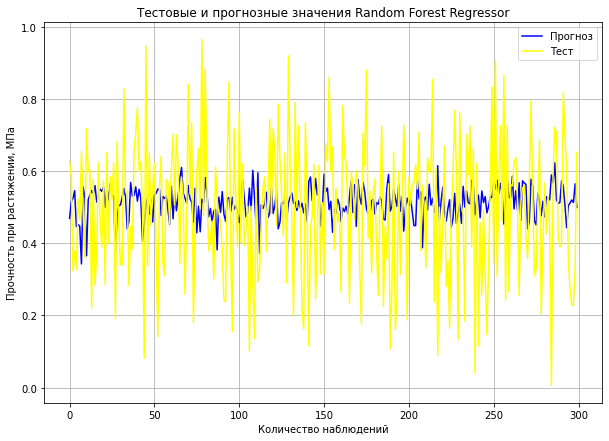

In [26]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Random Forest Regressor")
plt.plot(y_pred_test, label = "Прогноз", color = "blue")
plt.plot(y_test.values, label = "Тест", color = 'yellow')
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

In [15]:
# Поиск гиперпараметров для модели случайного леса 
parametrs = { 'n_estimators': range (10,51,10),
 'max_depth': range (1,13,2),}
grid = GridSearchCV(rfr, parametrs, cv = 10)
grid.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=7, n_estimators=15,
                                             random_state=33),
             param_grid={'max_depth': range(1, 13, 2),
                         'n_estimators': range(10, 51, 10)})

In [29]:
#модель множественной линейной регрессии
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)
det_train=lr.score(x_train, y_train)
det_test=lr.score(x_test, y_test)
mae_train = mean_absolute_error(y_pred_train, y_train)
mae_test = mean_absolute_error(y_pred_test, y_test)
print("Train score:",det_train) 
print('MAE_train:', mae_train)
print("Test score:",det_test)
print('MAE_test:', mae_test)

Train score: 0.03291726192147193
MAE_train: 366.11589808787494
Test score: -0.03477147578178896
MAE_test: 373.0075639658036


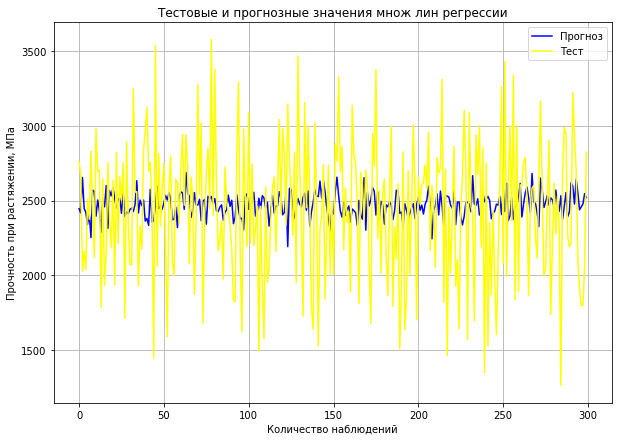

In [49]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения множ лин регрессии")
plt.plot(y_pred_test, label = "Прогноз", color = "blue")
plt.plot(y_test.values, label = "Тест", color = "yellow")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

In [30]:
# Метод К ближайших соседей
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_train=knn.predict(x_train)
y_pred_test=knn.predict(x_test)
det_train=knn.score(x_train, y_train)
det_test=knn.score(x_test, y_test)
mae_train = mean_absolute_error(y_pred_train, y_train)
mae_test = mean_absolute_error(y_pred_test, y_test)
print("Train score:",det_train) 
print('MAE_train:', mae_train)
print("Test score:",det_test)
print('MAE_test:', mae_test)

Train score: 0.23594749112239843
MAE_train: 327.34441436477914
Test score: -0.1501860790191376
MAE_test: 392.8776029259773


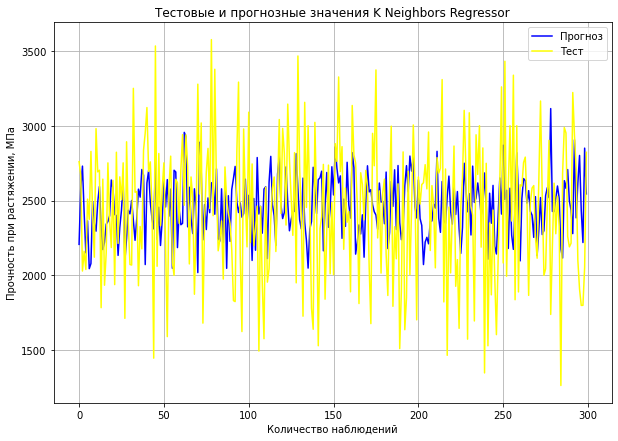

In [51]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения K Neighbors Regressor")
plt.plot(y_pred_test, label = "Прогноз", color = 'blue')
plt.plot(y_test.values, label = "Тест", color = 'yellow')
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);